In [1]:
import os
os.getcwd()

import tensorflow as tf

NUM_PARALLEL_EXEC_UNITS = 8
config = tf.ConfigProto(intra_op_parallelism_threads=NUM_PARALLEL_EXEC_UNITS, inter_op_parallelism_threads=2,
            allow_soft_placement=True, device_count={'CPU': NUM_PARALLEL_EXEC_UNITS})
# session = tf.Session(config=config)
os.environ["OMP_NUM_THREADS"] = "8"
os.environ["KMP_BLOCKTIME"] = "30"
os.environ["KMP_SETTINGS"] = "1"
os.environ["KMP_AFFINITY"] = "granularity=fine,verbose,compact,1,0"

In [2]:
# %run -i 'mask_to_label.py'

In [3]:
import pandas as pd
df = pd.read_csv('gleason_labels_3.csv')
df = df.rename(columns = {"2":"Gleason_Class_Label"})
df

,Gleason_Class_Label
0,2
1,3
2,3
3,0
4,3
...,...
2466,3
2467,3
2468,3
2469,3


In [4]:
import numpy as np
labels = np.array(df['Gleason_Class_Label'])
labels.shape

(2471,)

In [5]:
import os, shutil
from PIL import Image
import glob, os
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import pickle
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

train_dir = '/home/ecbm4040/Final_Project/Train_Data/Central_250x250'

# Training data
X_train = []

os.chdir(train_dir)

remove_multi = ['Patch_ZT111_4_A_1_12_15.jpg',
'Patch_ZT111_4_A_1_12_16.jpg','Patch_ZT111_4_A_1_12_2.jpg','Patch_ZT111_4_A_1_12_22.jpg',
'Patch_ZT111_4_A_1_12_23.jpg','Patch_ZT111_4_A_1_12_24.jpg','Patch_ZT111_4_A_1_12_29.jpg','Patch_ZT111_4_A_1_12_31.jpg','Patch_ZT111_4_A_1_12_35.jpg','Patch_ZT111_4_A_1_12_36.jpg',
'Patch_ZT111_4_A_1_12_37.jpg','Patch_ZT111_4_A_1_12_38.jpg','Patch_ZT111_4_A_1_12_39.jpg','Patch_ZT111_4_A_1_12_45.jpg',
'Patch_ZT111_4_A_1_12_46.jpg','Patch_ZT111_4_A_1_12_47.jpg','Patch_ZT111_4_A_1_7_24.jpg',
'Patch_ZT111_4_A_1_7_31.jpg','Patch_ZT111_4_A_1_7_37.jpg','Patch_ZT111_4_A_1_7_38.jpg',
'Patch_ZT111_4_A_2_1_32.jpg','Patch_ZT111_4_A_2_1_33.jpg','Patch_ZT111_4_A_2_1_39.jpg','Patch_ZT111_4_A_2_1_5.jpg',
'Patch_ZT111_4_A_3_12_16.jpg','Patch_ZT111_4_A_3_12_17.jpg','Patch_ZT111_4_A_3_12_32.jpg','Patch_ZT111_4_A_3_12_39.jpg','Patch_ZT111_4_A_3_12_40.jpg','Patch_ZT111_4_A_3_12_41.jpg',
'Patch_ZT111_4_A_3_2_11.jpg','Patch_ZT111_4_A_3_2_26.jpg','Patch_ZT111_4_A_3_4_16.jpg','Patch_ZT111_4_A_3_4_23.jpg','Patch_ZT111_4_A_3_4_38.jpg',
'Patch_ZT111_4_A_3_4_44.jpg','Patch_ZT111_4_A_3_4_8.jpg','Patch_ZT111_4_A_3_7_19.jpg','Patch_ZT111_4_A_3_7_26.jpg',
'Patch_ZT111_4_A_3_7_29.jpg','Patch_ZT111_4_A_3_7_33.jpg','Patch_ZT111_4_A_3_7_35.jpg','Patch_ZT111_4_A_3_7_37.jpg','Patch_ZT111_4_A_3_7_42.jpg',
'Patch_ZT111_4_A_4_13_45.jpg','Patch_ZT111_4_A_4_2_42.jpg','Patch_ZT111_4_A_4_2_43.jpg','Patch_ZT111_4_A_4_5_15.jpg',
'Patch_ZT111_4_A_4_5_16.jpg','Patch_ZT111_4_A_4_5_31.jpg','Patch_ZT111_4_A_4_5_35.jpg','Patch_ZT111_4_A_4_5_36.jpg',
'Patch_ZT111_4_A_4_5_39.jpg','Patch_ZT111_4_A_4_5_47.jpg','Patch_ZT111_4_A_5_11_23.jpg','Patch_ZT111_4_A_5_9_12.jpg',
'Patch_ZT111_4_A_5_9_13.jpg','Patch_ZT111_4_A_5_9_18.jpg','Patch_ZT111_4_A_5_9_20.jpg','Patch_ZT111_4_A_6_10_17.jpg',
'Patch_ZT111_4_A_6_4_12.jpg',
'Patch_ZT111_4_A_6_4_18.jpg',
'Patch_ZT111_4_A_6_4_19.jpg',
'Patch_ZT111_4_A_6_4_3.jpg',]

print(len(remove_multi))

for file in glob.glob("*.jpg"):
#     if file not in remove_multi:
#     should be 5733 - 64 = 5669
    im_train = Image.open(file)
    X_train.append(np.array(im_train))
#     print(type(X_train))
#     print(X_train)
#     print(X_train.shape)
    im_train.close()

X_train = np.array(X_train)
print(X_train.shape)

64
(5733, 250, 250, 3)


In [6]:
X_train_ = X_train[0:2535]
X_train_.shape

(2535, 250, 250, 3)

In [7]:
# Remove training images that have multiple or no annotations
X_train_ = np.delete(X_train_,[8,9,13,16,17,18,23,26,30,31,32,33,34,41,42,43,312,320,326,327,615,616,622,633,842,843,
                               860,867,869,870,984,1000,1038,1046,1062,1069,1077,1139,1147,1150,1155,1157,1159,1165,
                               1364,1459,1460,1527,1528,1545,1549,1550,1553,1562,1781,2112,2113,2118,2121,2166,2406,2412,2413,2425],0)

In [8]:
X_train_.shape

(2471, 250, 250, 3)

In [9]:
############################################
# #            Model Selection             #
############################################

%matplotlib inline
%load_ext autoreload
%autoreload 2

import os, shutil
from PIL import Image
import glob, os
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import pickle
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, AveragePooling2D, Conv2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications import ResNet101
# from tensorflow.keras.applications import ResNet152
# from tensorflow.keras.applications import ResNet50V2
# from tensorflow.keras.applications import ResNet101V2
# from tensorflow.keras.applications import ResNet152V2

base_model = MobileNet(input_shape = (250,250,3), alpha = 0.5, weights='imagenet', include_top = False, pooling = 'avg',
                      depth_multiplier=1, dropout=.2)

# base_model=VGG16(weights='imagenet',include_top=False) 
# base_model=Xception(weights='imagenet',include_top=False) 
# base_model=VGG19(weights='imagenet',include_top=False) 
# base_model=InceptionV3(weights='imagenet',include_top=False) 
# base_model=InceptionResNetV2(weights='imagenet',include_top=False) 
# base_model=MobileNetV2(weights='imagenet',include_top=False) 
# base_model=NASNet(weights='imagenet',include_top=False) 

x = base_model.output
x = BatchNormalization()(x)
preds = Dense(4, activation='softmax')(x) #final layer with softmax activation

Instructions for updating:
Colocations handled automatically by placer.


/home/ecbm4040/miniconda3/envs/envTF113/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [10]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 250, 250, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 251, 251, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 125, 125, 16)      432       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 125, 125, 16)      64        
_________________________________________________________________
conv1_relu (ReLU)            (None, 125, 125, 16)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 125, 125, 16)      144       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 125, 125, 16)      64        
__________

In [11]:
X = X_train_
y = labels

from tensorflow.keras import metrics

# Split training data into train and validation
# Simple hold-out validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, shuffle = True, random_state=42)

# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
# mean_image = np.mean(X_train, axis=0)
# X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
# X_val = X_val.astype(np.float32) - mean_image.astype(np.float32)

print('Train data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

y_train_dummy = tf.keras.utils.to_categorical(y_train)
y_val_dummy = tf.keras.utils.to_categorical(y_val)

print('Train labels shape (one-hot): ', y_train_dummy.shape)
print('Validation labels shape (one-hot): ', y_val_dummy.shape)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train_dummy,batch_size=32)
val_generator = val_datagen.flow(X_val, y_val_dummy,batch_size=32)
model = Model(inputs = base_model.input, outputs=preds)

model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.SGD(lr=1e-4, momentum=0.9, nesterov=True),
                  metrics=['acc', tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model.fit_generator(train_generator,
                                   steps_per_epoch=len(X_train) // 32, 
                                   epochs=200, 
                                   validation_data = val_generator)

Train data shape:  (1976, 250, 250, 3)
Training labels shape:  (1976,)
Validation data shape:  (495, 250, 250, 3)
Validation labels shape:  (495,)
Train labels shape (one-hot):  (1976, 4)
Validation labels shape (one-hot):  (495, 4)
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
62/62 [==============================] - 28s 450ms/step - loss: 1.8866 - acc: 0.2546 - recall: 0.1483 - precision: 0.2417 - val_loss: 1.6368 - val_acc: 0.3434 - val_recall: 0.1879 - val_precision: 0.3924
Epoch 2/200
62/62 [==============================] - 25s 408ms/step - loss: 1.7393 - acc: 0.2753 - recall: 0.1544 - precision: 0.2848 - val_loss: 1.5908 - val_acc: 0.3556 - val_recall: 0.2222 - val_precision: 0.4135
Epoch 3/200
62/62 [==============================] - 27s 434ms/step - loss: 1.7003 - acc: 0.2758 - recall: 0.1508 - precision: 0.2874 - val_loss: 1.6763 - val_acc: 0.3455 - val_recall: 0.2545 - val_precision: 0.3795
Epoch 4/200
62/62 [==============================] - 26s 418ms/step - l

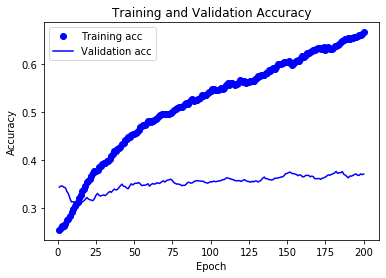

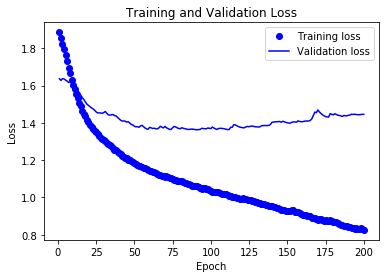

In [12]:
# ## ## ## ## ## ## ## ## ## ## ## #
# # Plot the Performance Results # #
# ## ## ## ## ## ## ## ## ## ## ## #

def smooth_curve(points,factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Plot the loss and accuracy of the model over the train/val datasets during training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, smooth_curve(acc), 'bo', label='Training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [13]:
os.chdir('/home/ecbm4040/Final_Project/Code')
model.save('Gleason_Grading_MobileNet_LAST.h5')

In [14]:
from tensorflow.keras.layers import UpSampling2D, Conv2D

# Compute model predictions (pixel-level probability maps) 
w_out, b_out = model.layers[-1].get_weights()
w_out = w_out[np.newaxis,np.newaxis,:,:]

# rescaling factor is 3
big_dim = 1024
base_model = MobileNet(include_top=False, weights=None,
                       input_shape=(big_dim, big_dim, 3),
                       alpha=.5, depth_multiplier=1, dropout=.2)
block_name = 'conv_pw_13_relu'
x_input = base_model.get_layer(block_name).output

# average pooling instead of global pooling
x = AveragePooling2D((7, 7), strides=(1,1), padding='same', name='avg_pool_top')(x_input)
x = Conv2D(4, (1, 1), activation='softmax', padding='same')(x)
x_out = UpSampling2D(size=(32, 32), name='upsample')(x)
big_model = Model(base_model.input, x_out)
model_weights = '/home/ecbm4040/Final_Project/Code/Gleason_Grading_MobileNet_LAST.h5'
big_model.load_weights(model_weights, by_name=True)
big_model.layers[-2].set_weights([w_out, b_out])

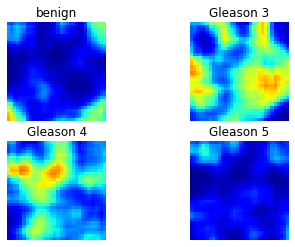

In [15]:
# Make predictions on entire TMA spots for the validation cohort.
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
import matplotlib.cm as cm

# os.chdir('/home/ecbm4040/Final_Project/Validation_Data')
os.chdir("/home/ecbm4040/Final_Project/Train_Data/")

def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)
        
        
def customize_axis(axis, title):
    axis.set_title(title)
    axis.grid(False)
    clean_axis(axis)
    return axis

# for file in sorted(glob.glob("*.jpg")):

# Sample image for heat map/segmentation
for file in glob.glob("ZT111_4_C_1_12.jpg"):
    img = image.load_img(file, grayscale=False, target_size=(big_dim, big_dim))
    X = image.img_to_array(img)
    X = preprocess_input(X)
    y_pred_prob = big_model.predict(X[np.newaxis,:,:,:], batch_size=1)[0]
    
    fig, ax = plt.subplots(2, 2)

    ax[0, 0].imshow(y_pred_prob[:,:,0], cmap=cm.jet, vmin=0, vmax=1)
    customize_axis(ax[0, 0], 'benign')
    
    ax[0, 1].imshow(y_pred_prob[:,:,1], cmap=cm.jet, vmin=0, vmax=1)
    customize_axis(ax[0, 1], 'Gleason 3')
    
    ax[1, 0].imshow(y_pred_prob[:,:,2], cmap=cm.jet, vmin=0, vmax=1)
    customize_axis(ax[1, 0], 'Gleason 4')
    
    ax[1, 1].imshow(y_pred_prob[:,:,3], cmap=cm.jet, vmin=0, vmax=1)
    customize_axis(ax[1, 1], 'Gleason 5')


In [16]:
preds2 = model.predict(X_val)

In [28]:
preds2[5:10]

array([[0.04897844, 0.02730244, 0.87659216, 0.04712703],
       [0.1138719 , 0.09836935, 0.63167346, 0.1560853 ],
       [0.23242277, 0.01400309, 0.49272862, 0.26084554],
       [0.05485246, 0.19910227, 0.6060262 , 0.14001909],
       [0.15809403, 0.02057771, 0.7419488 , 0.07937947]], dtype=float32)

In [18]:
preds2.shape

(495, 4)

In [19]:
# Convert the softmax probabilities to class labels 
# (i.e. if probability is highest in position 2, then convert to class label 2 == gleason 4)
predictions = []
for i in range(len(preds2)):
    a = np.argmax(preds2[i])
    predictions.append(a)    
predictions = np.array(predictions)

In [20]:
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
import itertools

def plot_confusion_matrix(cm, classes, figname=None, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure(figsize=(7,7))
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=18)
    plt.yticks(tick_marks, classes, fontsize=18)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, '%.2f' % cm[i, j], horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=16)
        else:
            plt.text(j, i, cm[i, j], horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                      fontsize=16)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    if title is not None:
        plt.title(title)
        plt.colorbar()
    if figname is None:
        plt.show()
    else:
        plt.savefig(figname)
        plt.close()

In [22]:
# y_val_dummy

[[0.05172414 0.         0.92241379 0.02586207]
 [0.         0.         0.95238095 0.04761905]
 [0.01807229 0.         0.96385542 0.01807229]
 [0.03645833 0.         0.93229167 0.03125   ]]


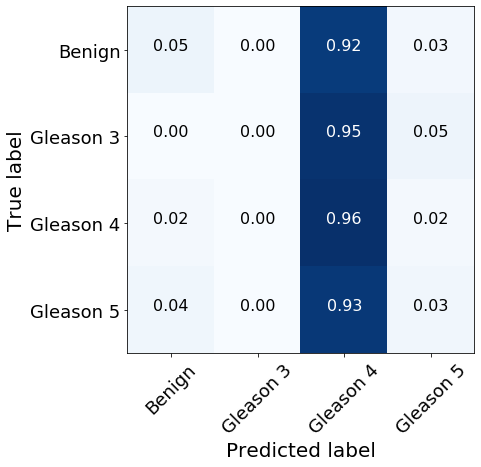

In [23]:
# Create confusion matrix
# Hotter blue means more examples of that class
# Convert the labels from categorical to gleason class labels
# i.e a 1 in position 4 is gleason 5 (label == 3)
emp = []
for yy in range(len(y_val_dummy)):
    if y_val_dummy[yy][0] == 1:
        emp.append(np.int(0))
    elif y_val_dummy[yy][1] == 1:
        emp.append(np.int(1))
    elif y_val_dummy[yy][2] == 1:
        emp.append(np.int(2))
    elif y_val_dummy[yy][3] == 1:
        emp.append(np.int(3))
new_labels = np.array(emp)

cm_new = confusion_matrix(new_labels, predictions)
plot_confusion_matrix(cm_new, ["Benign","Gleason 3","Gleason 4", "Gleason 5"], figname=None, normalize=True)

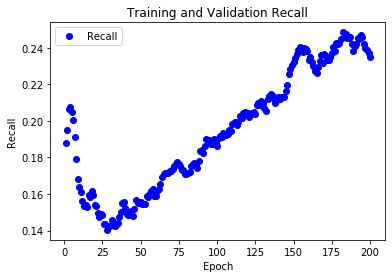

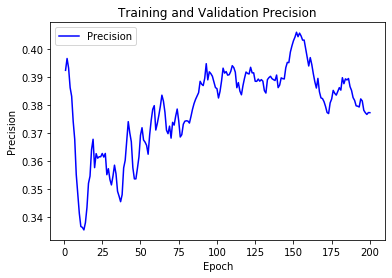

In [24]:
recall = history.history['val_recall']
prec = history.history['val_precision']

plt.figure()

plt.plot(epochs,smooth_curve(recall),'bo',label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Training and Validation Recall')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs,smooth_curve(prec),'b',label='Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()
plt.show()